In [18]:
import pandas as pd
import sklearn
import numpy as np

***
# **Overview & Breakdown**
***

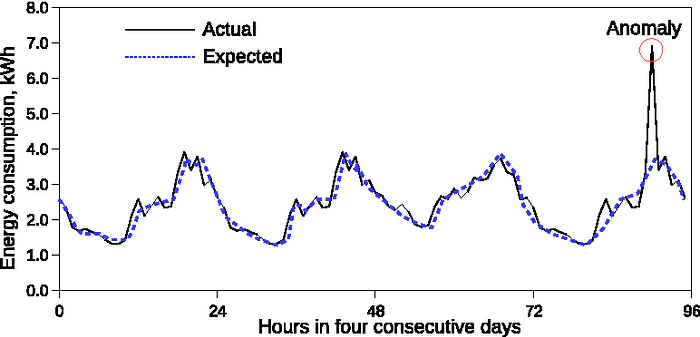

### This notebook will focus on covering the technical aspects surrounding anomaly detection in financial data, and whilst it is supposed to be exclusively around General Ledger/Investment data, it helps to know what kind of anomalies exist

# MS-SQL Connection Segment

### This section is to confirm the ability to connect to the server, where the excel file for table data was imported to. This uses a python package that connects using certain key information:

* Assuming this is all using Windows Authentication *(Since Local)*
* Server Name --> Database Name

In [19]:
#Attempt to try to connect to a local Windows Authentication based MS-SQL Server
import pyodbc

conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=LAPTOP-E29M9JAU;'
    'Database=Test;'
    'Trusted_Connection=yes;' 
)

In [20]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM loan_data_2007_2014')

In [23]:
pd.set_option('display.max_columns', None)


df = pd.read_sql_query('SELECT TOP 100 * FROM loan_data_2007_2014', conn)

df.head(n=10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,None,None,3,0,13648,83.7,9,f,0,0,5861.071414,5831.78,5000,861.07,0,0,0,Jan-15,171.62,None,Jan-16,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1,0,Apr-99,5,None,None,3,0,1687,9.4,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,None,Sep-13,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,None,None,2,0,2956,98.5,10,f,0,0,3003.653644,3003.65,2400,603.65,0,0,0,Jun-14,649.91,None,Jan-16,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,None,10,0,5598,21,37,f,0,0,12226.30221,12226.3,10000,2209.33,16.97,0,0,Jan-15,357.48,None,Jan-15,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,None,15,0,27783,53.9,38,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0,0,0,Jan-16,67.79,Feb-16,Jan-16,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,Nov-04,3,None,None,9,0,7963,28.3,12,f,0,0,5631.377753,5631.38,5000,631.38,0,0,0,Jan-15,161.03,None,Sep-15,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,1069639,1304742,7000,7000,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,Dec-11,Current,n,https://www.lending

# General Ledger Errors
### In order to showcase basic data access, we remember the noted 7 errors:

1. Subsidiary Errors
2. Omission Errors
3. Transposition Erros
4. Rounding Errors
5. Principle Errors
6. Reversal Errors
7. Commission Errors

# <font color='red'>Subsidiary Error</font> 

In [25]:
#1 Subsidiary Errors
S1 = pd.read_sql_query('SELECT TOP 10  id,loan_amnt, funded_amnt FROM loan_data_2007_2014 where loan_amnt <> funded_amnt', conn)

S1

,id,loan_amnt,funded_amnt
0,1068934,17500,8950
1,1069093,12500,8925
2,1069043,20975,13575
3,1068416,7250,7200
4,1068994,35000,22075
5,1049528,20000,12800
6,1068179,28000,11800
7,1066664,21000,11800
8,1060644,24250,18100
9,1056150,13200,8975


# <font color='red'>Omission Error</font> 

In [26]:
#2 Omission Errors
S2 = pd.read_sql_query('SELECT TOP 50 * FROM loan_data_2007_2014', conn)

#Following Method returns an entry with ANY null value, which unfortunately is all of them since there are 15+ null columns for
#every row. This means that they must be narrowed down to certain columns, or data preprocessing is needed

null_values = S2[S2.isna().any(axis=1)]
null_values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,None,None,3,0,13648,83.7,9,f,0,0,5861.071414,5831.78,5000,861.07,0,0,0,Jan-15,171.62,None,Jan-16,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1,0,Apr-99,5,None,None,3,0,1687,9.4,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,None,Sep-13,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,None,None,2,0,2956,98.5,10,f,0,0,3003.653644,3003.65,2400,603.65,0,0,0,Jun-14,649.91,None,Jan-16,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,None,10,0,5598,21,37,f,0,0,12226.30221,12226.3,10000,2209.33,16.97,0,0,Jan-15,357.48,None,Jan-15,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,None,15,0,27783,53.9,38,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0,0,0,Jan-16,67.79,Feb-16,Jan-16,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,Nov-04,3,None,None,9,0,7963,28.3,12,f,0,0,5631.377753,5631.38,5000,631.38,0,0,0,Jan-15,161.03,None,Sep-15,0,None,1,INDIVIDUAL,None,None,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,1069639,1304742,7000,7000,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,Dec-11,Current,n,https://www.lending

In [43]:
#When focusing around certain columns, the results become much more clear, but this is also assuming these corners are where 
#the problems will occur

S2_2 = pd.read_sql_query('SELECT TOP 50 id, funded_amnt_inv, emp_title, emp_length, description FROM loan_data_2007_2014', conn)

null_values_trimmed = S2_2[S2_2.isna().any(axis=1)]
null_values_trimmed

,id,funded_amnt_inv,emp_title,emp_length,description
0,1077501,4975,None,10+ years,Borrower added on 12/22/11 > I need to upgrade...
2,1077175,2400,None,10+ years,None
5,1075269,5000,Veolia Transportaton,3 years,None
8,1071795,5600,None,4 years,Borrower added on 12/21/11 > I own a small hom...
11,1069908,12000,UCLA,10+ years,None
14,1069057,10000,SFMTA,3 years,None
15,1069759,1000,Internal revenue Service,< 1 year,None
16,1065775,10000,Chin's Restaurant,4 years,None
19,1069742,9200,Network Interpreting Service,6 years,None
23,1069700,10000,Wells Fargo Bank,5 years,None


### To help with understanding empty values easier, the following code segment shows all columns that have null-values inside them. Obviously, most of these have the entire column just empty, so preprocessing is needed.

### Maybe the Censof dataset won't be as messy as this. Hopefully :)

In [32]:
S2.columns[S2.isna().any()].tolist()

['emp_title',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [48]:
S2_3 = S2
S2_3.dropna(how='all', axis=1, inplace=True)

S2_3.columns[S2_3.isna().any()].tolist()

['emp_title', 'desc', 'mths_since_last_delinq', 'last_pymnt_d', 'next_pymnt_d']

### Based off what you see above, these are the columns that are not 100% empty, but have null value inside them, which are probably be the omission error

# <font color='red'>Transposition Error</font> 

### Given how vague this error can be, we are now assuming that the dataset will have existing history logs of the same client repeated, which should indicate an error if they somehow have a different value from before

In [58]:
S3 = pd.read_sql_query('SELECT TOP 10 emp_title, count(emp_title) from loan_data_2007_2014 \
                    GROUP BY emp_title HAVING count(emp_title)>2', conn)

S3

,emp_title,
0,1199 National Benefit Fund,3
1,1Sg,5
2,1st Source Bank,3
3,1st Grade Teacher,6
4,20th Century Fox,6
5,21st Century Oncology,4
6,24 Hour Fitness,19
7,2nd grade teacher,6
8,2ND SHIFT SUPERVISOR,6
9,3M Company,10


In [76]:
S3_1 = pd.read_sql_query('SELECT TOP 100 * FROM loan_data_2007_2014', conn)
S3_1.dropna(how="all", axis=1, inplace=True)

S3_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,description,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,None,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,None,3,0,13648,83.7,9,f,0,0,5861.071414,5831.78,5000,861.07,0,0,0,Jan-15,171.62,None,Jan-16,0,1,INDIVIDUAL,0
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1,0,Apr-99,5,None,3,0,1687,9.4,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,None,Sep-13,0,1,INDIVIDUAL,0
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,None,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,None,2,0,2956,98.5,10,f,0,0,3003.653644,3003.65,2400,603.65,0,0,0,Jun-14,649.91,None,Jan-16,0,1,INDIVIDUAL,0
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,10,0,5598,21,37,f,0,0,12226.30221,12226.3,10000,2209.33,16.97,0,0,Jan-15,357.48,None,Jan-15,0,1,INDIVIDUAL,0
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38,15,0,27783,53.9,38,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0,0,0,Jan-16,67.79,Feb-16,Jan-16,0,1,INDIVIDUAL,0
5,1075269,1311441,5000,5000,5000,36 months,7.9,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,Nov-04,3,None,9,0,7963,28.3,12,f,0,0,5631.377753,5631.38,5000,631.38,0,0,0,Jan-15,161.03,None,Sep-15,0,1,INDIVIDUAL,0
6,1069639,1304742,7000,7000,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,None,7,0,17726,85.6,11,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0,0,0,Jan-16,170.08,Feb-16,Jan-16,0,1,INDIVIDUAL,0
7,1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > Downpayment for a...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,None,4,0,8221,87.5,4,f,0,0,3938.144334,3938.14,3000,938.14,0,0,0,Jan-15,111.34,None,Dec-14,0,1,INDIVIDUAL,0
8,1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2,None,4 years,OWN,40000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I own a small hom...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,None,11,0,5210,32.6,13,f,0,